In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_mil = pd.read_csv('./data/STRIKE_REPORTS_BASH (1990-Current).csv')
data_90 = pd.read_csv('./data/STRIKE_REPORTS (1990-1999).csv', encoding = "ISO-8859-1")
data_00 = pd.read_csv('./data/STRIKE_REPORTS (2000-2009).csv', encoding = "ISO-8859-1")
data_10 = pd.read_csv('./data/STRIKE_REPORTS (2010-Current).csv', encoding = "ISO-8859-1")
data = pd.concat([data_90, data_00, data_10, data_mil])
data.head()

/home/shlapo/.anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,7,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,7,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INDEX_NR,OPID,OPERATOR,ATYPE,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,...,REPORTED_NAME,REPORTED_TITLE,REPORTED_DATE,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE
0,100000,AAL,AMERICAN AIRLINES,B-727,148,10,34.0,10,A,4.0,...,Deleted,Deleted,5/14/1992,FAA Form 5200-7,Pilot,NaN,NaN,3/14/1996,False,False
1,100001,UAL,UNITED AIRLINES,B-737-300,148,24,10.0,01,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,12/20/2007,False,False
2,100002,UAL,UNITED AIRLINES,B-737-300,148,24,10.0,01,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,12/20/2007,False,False
3,100003,UAL,UNITED AIRLINES,B-757-200,148,26,34.0,40,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,12/20/2007,False,False
4,100004,UAL,UNITED AIRLINES,A-320,04A,03,23.0,01,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,12/20/2007,False,False


In [61]:
# Correction for sky
data.SKY.replace(['No CLoud', 'NO Cloud', 'No Clouds'], 'No Cloud', inplace=True)
data.SKY.replace(['SOme Cloud', 'Some Clouds'], 'Some Cloud', inplace=True)
data.SKY.value_counts()

# Correction for size
data.SIZE.replace('LARGE', 'Large', inplace=True)
data.SIZE.replace('SMALL', 'Small', inplace=True)

#Correction for time of day
data.TIME_OF_DAY.replace('DAWN', 'Dawn', inplace=True)
data.TIME_OF_DAY.replace('DAY', 'Day', inplace=True)
data.TIME_OF_DAY.replace('DUSK', 'Dusk', inplace=True)
data.TIME_OF_DAY.replace('NIGHT', 'Night', inplace=True)


### Columns to Investigate

- Month, Year
- State
- Height


In [62]:
data_freq = pd.crosstab(index=data.BIRDS_STRUCK, columns=data.BIRDS_SEEN)
data_freq.drop('Over 100', inplace=True)
data_freq.drop('0', axis=1, inplace=True)
data_freq

BIRDS_SEEN,1,11-100,2-10,Over 100
BIRDS_STRUCK,,,,
1,35639,2170,11777,209
11-100,16,641,35,142
2-10,514,2424,8982,292


In [63]:
import scipy.stats as stats
results = stats.chi2_contingency(observed=data_freq)
results[3]

array([[  2.86601957e+04,   4.14819664e+03,   1.64770966e+04,
          5.09511068e+02],
       [  4.80020146e+02,   6.94767747e+01,   2.75969447e+02,
          8.53363250e+00],
       [  7.02878420e+03,   1.01732659e+03,   4.04093391e+03,
          1.24955300e+02]])

In [64]:
expected = results[3]
(data_freq - expected)/(expected**.5)

BIRDS_SEEN,1,11-100,2-10,Over 100
BIRDS_STRUCK,,,,
1,41.223176,-30.714241,-36.615624,-13.313237
11-100,-21.179081,68.566828,-14.505459,45.688287
2-10,-77.706962,44.102487,77.728411,14.943604


In [65]:
month_struck = pd.crosstab(index=data.BIRDS_STRUCK, columns=data.INCIDENT_MONTH)
month_struck.drop('Over 100', inplace=True)

In [66]:
(chi, p, dof, expected) = stats.chi2_contingency(observed=month_struck)
p

7.2513102308696368e-249

In [67]:
(month_struck - expected)/(expected**.5)

INCIDENT_MONTH,1,2,3,4,5,6,7,8,9,10,11,12
BIRDS_STRUCK,,,,,,,,,,,,
1,-4.385337,-2.007332,0.949740,3.467345,6.892614,3.313823,-0.027069,-2.927226,0.007329,1.202083,-5.315190,-5.391401
11-100,1.395712,3.019689,-1.702364,-2.086698,-7.317984,-3.229543,-1.275360,3.044118,0.249048,-0.743422,6.012091,6.832602
2-10,11.030647,4.496952,-2.064201,-8.493556,-16.148842,-7.831000,0.365882,6.873042,-0.076737,-2.939967,12.367508,12.374531


In [68]:
month = pd.crosstab(index=data.INCIDENT_MONTH, columns="strikes")
expected_ratio = pd.DataFrame([0.0805825506,
0.0743081384,
0.0855245698,
0.0829882006,
0.0854051413,
0.0860965958,
0.0897943694,
0.0892407091,
0.0811542073,
0.0837319905,
0.07962685,
0.0815466772], index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
month['ratio'] = expected_ratio
month['expected'] = month.ratio*[month.strikes.sum()/12]*12
month

col_0,strikes,ratio,expected
INCIDENT_MONTH,,,
1,6057,0.080583,13634.164649
2,5561,0.074308,12572.565477
3,8721,0.085525,14470.329587
4,12637,0.082988,14041.188601
5,16891,0.085405,14450.122882
6,14504,0.086097,14567.113526
7,21910,0.089794,15192.758331
8,23828,0.089241,15099.081776
9,21629,0.081154,13730.886104


In [69]:
stats.chisquare(f_obs=month.strikes, f_exp=month.expected)

Power_divergenceResult(statistic=30010.497779218975, pvalue=0.0)

In [70]:
(month.strikes-month.expected)/(month.expected**.5)

INCIDENT_MONTH
1    -64.892194
2    -62.532104
3    -47.794508
4    -11.850141
5     20.305334
6     -0.522921
7     54.497008
8     71.037089
9     67.402206
10    47.535805
11   -20.569013
12   -61.724628
dtype: float64

Looks like months 5, 6-10 have significant impact on bird strikes. Months have different average weather, so lets see if weather and months have any correlation

In [71]:
month_sky = pd.crosstab(index=data.INCIDENT_MONTH, columns=data.SKY)
month_sky


SKY,No Cloud,Overcast,Some Cloud
INCIDENT_MONTH,,,
1,1418,921,861
2,1353,695,894
3,2267,1049,1379
4,3326,1280,2135
5,4132,1643,3041
6,3234,1084,2702
7,4951,1499,4242
8,5674,1872,4872
9,6115,1715,3720


In [72]:
(chi, p, dof, expected) = stats.chi2_contingency(observed=month_sky)
chi, p, dof, expected

(1588.4404967678356,
 0.0,
 22,
 array([[ 1558.91386702,   567.47499036,  1073.61114262],
        [ 1433.22643649,   521.72231926,   987.05124424],
        [ 2287.21893927,   832.59221242,  1575.18884831],
        [ 3283.949493  ,  1195.42153438,  2261.62897262],
        [ 4294.80770365,  1563.39359844,  2957.79869791],
        [ 3419.86729578,  1244.8982601 ,  2355.23444412],
        [ 5208.72095819,  1896.07581154,  3587.20323027],
        [ 6049.56012522,  2202.15763446,  4166.28224032],
        [ 5626.70473879,  2048.23004333,  3875.06521788],
        [ 5112.26316267,  1860.96329651,  3520.77354082],
        [ 2989.7045006 ,  1088.31062995,  2058.98486945],
        [ 1686.0627793 ,   613.75966926,  1161.17755144]]))

In [73]:
(month_sky - expected)/(expected**.5)

SKY,No Cloud,Overcast,Some Cloud
INCIDENT_MONTH,,,
1,-3.568968,14.840440,-6.488772
2,-2.119142,7.586176,-2.961777
3,-0.422770,7.499921,-4.943198
4,0.733792,2.446241,-2.662701
5,-2.484295,2.013325,1.529839
6,-3.178325,-4.560206,7.145274
7,-3.570953,-9.118966,10.932728
8,-4.828559,-7.035535,10.933437
9,6.509617,-7.363000,-2.491007


In [74]:
time_sky = pd.crosstab(index=data.TIME_OF_DAY, columns=data.SKY)
time_sky

SKY,No Cloud,Overcast,Some Cloud
TIME_OF_DAY,,,
Dawn,1399,749,846
Day,23828,10912,19591
Dusk,1816,652,1590
Night,14314,2882,6499


In [75]:
(chi, p, dof, expected) = stats.chi2_contingency(observed=time_sky)
chi, p, dof, expected

(2050.2775271879332,
 0.0,
 6,
 array([[  1455.40395872,    534.73083523,   1003.86520605],
        [ 26410.67217142,   9703.56079127,  18216.76703731],
        [  1972.62166483,    724.76210066,   1360.61623451],
        [ 11518.30220504,   4231.94627283,   7944.75152213]]))

In [76]:
(time_sky - expected)/(expected**.5)

SKY,No Cloud,Overcast,Some Cloud
TIME_OF_DAY,,,
Dawn,-1.478488,9.265995,-4.982516
Day,-15.892037,12.267590,10.181803
Dusk,-3.526387,-2.702760,6.218632
Night,26.049296,-20.751353,-16.220099


Strikes on Some Cloud days occur most often during the Day.

In [77]:
height_sky = pd.crosstab(index=data.HEIGHT, columns=data.SKY)
height_sky

SKY,No Cloud,Overcast,Some Cloud
HEIGHT,,,
0.0,12470,6805,11417
1.0,40,13,28
2.0,77,37,51
3.0,60,28,42
4.0,26,12,25
5.0,411,165,258
6.0,15,9,9
7.0,16,6,12
8.0,25,8,18


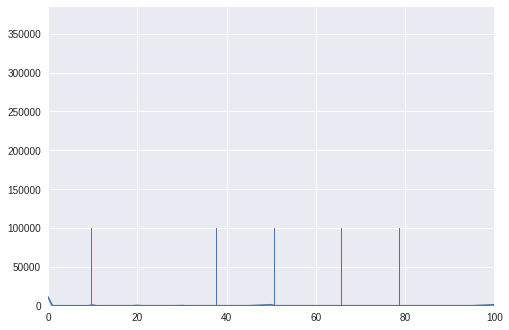

In [78]:
plt.plot(height_sky.index.values, height_sky['Some Cloud'])
plt.xlim(0, 100)
plt.show()

In [90]:
data.query('HEIGHT==0.0').query("SKY=='Some Cloud'").SPECIES.value_counts()


Unknown bird - small         2403
Unknown bird - medium         969
Gulls                         686
Mourning dove                 656
Barn swallow                  474
European starling             434
Sparrows                      402
American kestrel              343
Killdeer                      342
Rock pigeon                   305
Red-tailed hawk               223
Horned lark                   206
Doves                         195
Unknown bird                  187
Swallows                      173
Hawks                         150
Eastern meadowlark            140
Pacific golden-plover         131
Cliff swallow                 131
Blackbirds                    123
Canada goose                  112
Ring-billed gull              107
White-tailed deer              88
Egrets                         85
Barn owl                       81
Unknown bird - large           80
Tree swallow                   79
Cattle egret                   68
Bank swallow                   68
Coyote        

Should be investigating the strikes that occur at height 0.0

In [102]:
bird_sky = pd.crosstab(index=data.SPECIES, columns=data.SKY)
bird_sky = bird_sky.sort_values(by='Some Cloud', ascending=False).iloc[0:30]
bird_sky

SKY,No Cloud,Overcast,Some Cloud
SPECIES,,,
Unknown bird - small,14638,3545,8256
Unknown bird - medium,8291,2077,4314
Gulls,1855,1800,1653
Mourning dove,993,513,1010
European starling,803,535,833
Barn swallow,625,438,758
Unknown bird,1097,262,750
Sparrows,1043,426,739
Unknown bird - large,1199,314,697


In [100]:
(chi, p, dof, expected) = stats.chi2_contingency(observed=bird_sky)
chi, p, dof, expected

(3370.0146656027105,
 0.0,
 58,
 array([[ 13125.6376727 ,   4594.51706061,   8718.84526669],
        [  7288.87674687,   2551.40888399,   4841.71436914],
        [  2635.15582158,    922.41372812,   1750.4304503 ],
        [  1249.06783103,    437.22549735,    829.70667162],
        [  1077.79263162,    377.27208059,    715.93528779],
        [   904.03518295,    316.44977372,    600.51504333],
        [  1047.01274071,    366.49784337,    695.48941592],
        [  1096.16127619,    383.70186731,    728.13685649],
        [  1097.1541759 ,    384.04942335,    728.79640075],
        [   757.58247621,    265.18525793,    503.23226586],
        [   621.55521639,    217.57008056,    412.87470305],
        [   598.22207329,    209.40251364,    397.37541308],
        [   564.46348326,    197.5856083 ,    374.95090844],
        [   522.76169558,    182.98825466,    347.25004977],
        [   610.13686977,    213.57318611,    405.28994413],
        [   493.47115423,    172.7353515 ,    327.793

In [101]:
(bird_sky - expected)/(expected**.5)

SKY,No Cloud,Overcast,Some Cloud
SPECIES,,,
Unknown bird - small,13.200660,-15.483515,-4.956856
Unknown bird - medium,11.737912,-9.392102,-7.584018
Gulls,-15.197712,28.895282,-2.328747
Mourning dove,-7.245394,3.623851,6.259179
European starling,-8.370232,8.120471,4.375111
Barn swallow,-9.280392,6.832873,6.426539
Unknown bird,1.544839,-5.458479,2.066977
Sparrows,-1.605677,2.159356,0.402577
Unknown bird - large,3.074747,-3.574465,-1.177809


Nothing specific for Some Cloud conditions. Although if we wanted to investigate Overcast (for months December, January when it was significant) we would look at Gulls.